# Tugas Data Mining

### Winantri Nurbuwah Insyroh (06211640000034)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('latihan5maret.csv')

In [5]:
data.shape

(300, 13)

In [7]:
data.head(n=10)

,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,164427,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1,91039,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K
2,347934,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
3,371373,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,32220,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K
5,187251,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,25,United-States,<=50K
6,178107,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0,0,20,United-States,<=50K
7,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
8,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
9,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K


# Imputation Missing Value

In [8]:
data = data.replace(' ', np.nan)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    295 non-null object
type              300 non-null object
dtypes: int64(5), object(8)
memory usage: 21.1+ KB


In [10]:
np.sum(data.isnull())

fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        19
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     5
type               0
dtype: int64

In [11]:
data.isnull().sum()

fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        19
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     5
type               0
dtype: int64

In [12]:
data.isnull().sum().sum()

24

# Memisahkan Kolom

In [13]:
Y = ['type']
X_int = ['capital-gain', 'capital-loss', 'hours-per-week', 'education-num', 'fnlwgt']
X_cat = ['education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [14]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

# Melihat Jumlah Kelas

In [15]:
#show all distinct value of class
print(data_Y['type'].unique())

[' <=50K' ' >50K']


In [16]:
## find missing data for each data type and fill it with mean and mode
data_int_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)

    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [17]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [18]:
data_int_clean

,capital-gain,capital-loss,hours-per-week,education-num,fnlwgt
0,0.0,0.0,40.0,13.0,164427.0
2,0.0,0.0,35.0,9.0,347934.0
3,0.0,0.0,40.0,9.0,371373.0
4,0.0,0.0,60.0,12.0,32220.0
5,0.0,0.0,25.0,9.0,187251.0
6,0.0,0.0,20.0,13.0,178107.0
7,0.0,0.0,36.0,9.0,343121.0
8,0.0,0.0,40.0,10.0,262749.0
9,0.0,0.0,40.0,3.0,403107.0
10,0.0,0.0,35.0,10.0,64293.0


In [19]:
data_cat_clean

,education,marital-status,occupation,relationship,race,sex,native-country
0,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States
2,HS-grad,Never-married,Other-service,Not-in-family,White,Female,United-States
3,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,United-States
4,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
5,HS-grad,Divorced,Prof-specialty,Unmarried,White,Female,United-States
6,Bachelors,Never-married,Craft-repair,Own-child,White,Male,United-States
7,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
8,Some-college,Never-married,Machine-op-inspct,Own-child,White,Male,United-States
9,5th-6th,Never-married,Other-service,Own-child,White,Male,El-Salvador
10,Some-college,Never-married,Prof-specialty,Not-in-family,White,Female,United-States


# Standardize

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
data['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])
data['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])

C:\Users\ASPIRE\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASPIRE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\ASPIRE\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASPIRE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\ASPIRE\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return

In [22]:
data.head()

,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,-0.246596,Bachelors,1.177309,Divorced,Prof-specialty,Unmarried,White,Female,-0.152801,-0.19734,0.023696,United-States,<=50K
1,-0.972423,Bachelors,1.177309,Married-civ-spouse,Sales,Husband,White,Male,2.212352,-0.19734,1.639366,United-States,>50K
2,1.568336,HS-grad,-0.465448,Never-married,Other-service,Not-in-family,White,Female,-0.152801,-0.19734,-0.380221,United-States,<=50K
3,1.800153,HS-grad,-0.465448,Divorced,Adm-clerical,Not-in-family,White,Male,-0.152801,-0.19734,0.023696,United-States,<=50K
4,-1.554158,Assoc-acdm,0.766620,Never-married,Exec-managerial,Not-in-family,White,Female,-0.152801,-0.19734,1.639366,United-States,<=50K


# Normalize

In [23]:
from sklearn.preprocessing import Normalizer 

In [24]:
data['education-num'] = Normalizer().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = Normalizer().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = Normalizer().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = Normalizer().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])
data['fnlwgt'] = Normalizer().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])

In [25]:
data.head()

,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,-1.0,Bachelors,1.0,Divorced,Prof-specialty,Unmarried,White,Female,-1.0,-1.0,1.0,United-States,<=50K
1,-1.0,Bachelors,1.0,Married-civ-spouse,Sales,Husband,White,Male,1.0,-1.0,1.0,United-States,>50K
2,1.0,HS-grad,-1.0,Never-married,Other-service,Not-in-family,White,Female,-1.0,-1.0,-1.0,United-States,<=50K
3,1.0,HS-grad,-1.0,Divorced,Adm-clerical,Not-in-family,White,Male,-1.0,-1.0,1.0,United-States,<=50K
4,-1.0,Assoc-acdm,1.0,Never-married,Exec-managerial,Not-in-family,White,Female,-1.0,-1.0,1.0,United-States,<=50K


# Deteksi Outlier

In [26]:
### for detect outlier
data_num_w_type = pd.concat([data_int_clean, data_cat_clean, data_Y], axis=1)

In [27]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

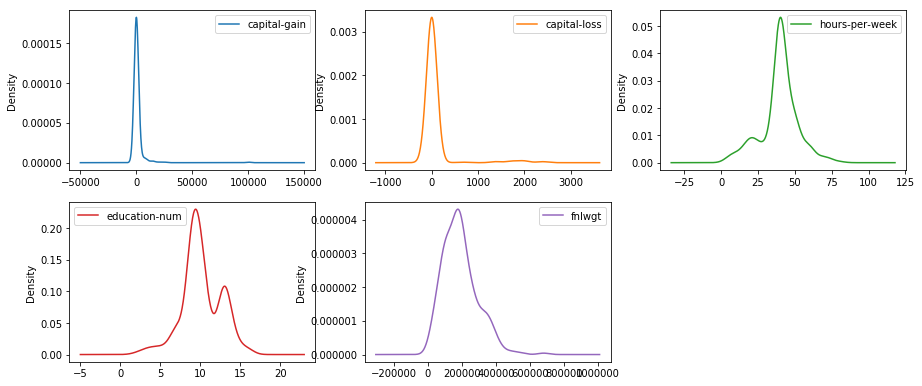

In [28]:
# Univariate Density Plots
data_num_w_type.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

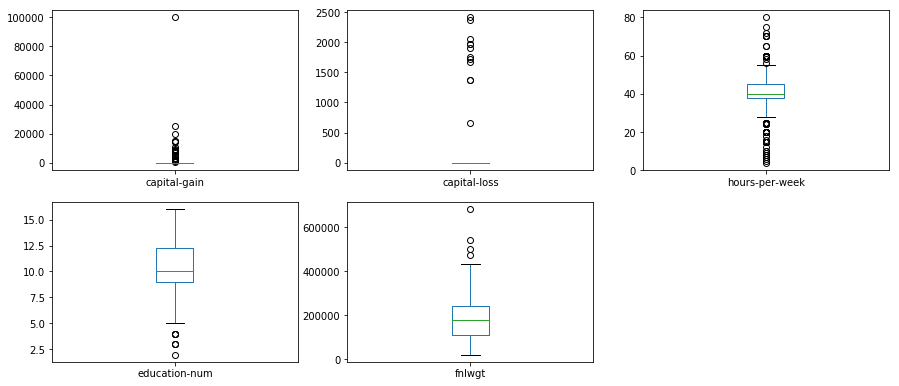

In [29]:
data_num_w_type.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [30]:
colors_palette = {" <=50K": "red",  " >50K": "blue"}
colors = [colors_palette[c] for c in data_num_w_type['type']]

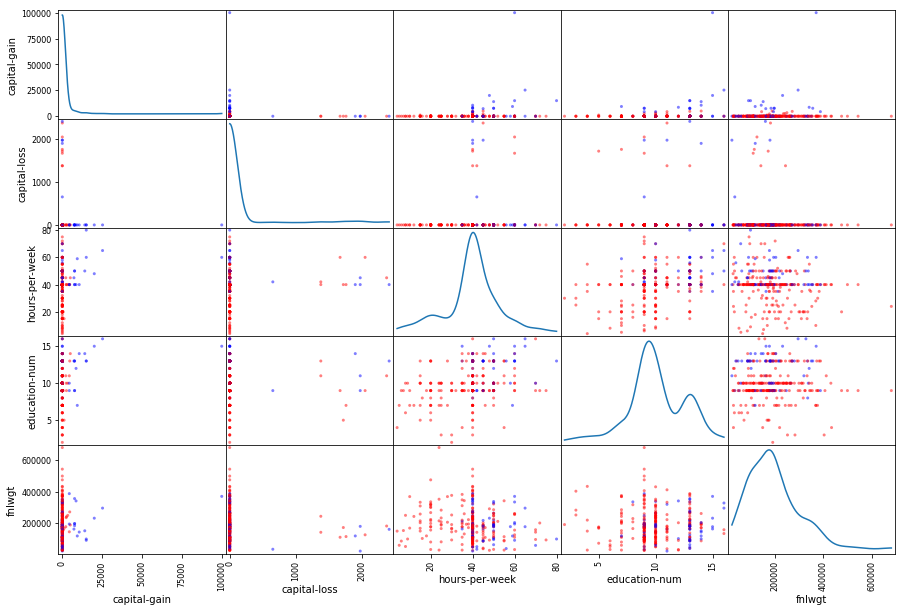

In [31]:
## red : <=50k
## blue: >50k
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_type, color=colors, diagonal='kde')
plt.show()

In [36]:
data_cleaned = pd.concat([data_num_w_type, data_cat_clean], axis=1)

In [39]:
# rearrange columns position to default
data_cleaned = data_cleaned[data.columns]

In [40]:
data_cleaned.to_csv('latihan5maret_full_cleaned.csv', index=0)

In [41]:
data_cleaned

,fnlwgt,education,education,education-num,marital-status,marital-status,occupation,occupation,relationship,relationship,race,race,sex,sex,capital-gain,capital-loss,hours-per-week,native-country,native-country,type
0,164427.0,Bachelors,Bachelors,13.0,Divorced,Divorced,Prof-specialty,Prof-specialty,Unmarried,Unmarried,White,White,Female,Female,0.0,0.0,40.0,United-States,United-States,<=50K
1,91039.0,Bachelors,Bachelors,13.0,Married-civ-spouse,Married-civ-spouse,Sales,Sales,Husband,Husband,White,White,Male,Male,15024.0,0.0,60.0,United-States,United-States,>50K
2,347934.0,HS-grad,HS-grad,9.0,Never-married,Never-married,Other-service,Other-service,Not-in-family,Not-in-family,White,White,Female,Female,0.0,0.0,35.0,United-States,United-States,<=50K
3,371373.0,HS-grad,HS-grad,9.0,Divorced,Divorced,Adm-clerical,Adm-clerical,Not-in-family,Not-in-family,White,White,Male,Male,0.0,0.0,40.0,United-States,United-States,<=50K
4,32220.0,Assoc-acdm,Assoc-acdm,12.0,Never-married,Never-married,Exec-managerial,Exec-managerial,Not-in-family,Not-in-family,White,White,Female,Female,0.0,0.0,60.0,United-States,United-States,<=50K
5,187251.0,HS-grad,HS-grad,9.0,Divorced,Divorced,Prof-specialty,Prof-specialty,Unmarried,Unmarried,White,White,Female,Female,0.0,0.0,25.0,United-States,United-States,<=50K
6,178107.0,Bachelors,Bachelors,13.0,Never-married,Never-married,Craft-repair,Craft-repair,Own-child,Own-child,White,White,Male,Male,0.0,0.0,20.0,United-States,United-States,<=50K
7,343121.0,HS-grad,HS-grad,9.0,Divorced,Divorced,Adm-clerical,Adm-clerical,Unmarried,Unmarried,White,White,Female,Female,0.0,0.0,36.0,United-States,United-States,<=50K
8,262749.0,Some-college,Some-college,10.0,Never-married,Never-married,Machine-op-inspct,Machine-op-inspct,Own-child,Own-child,White,White,Male,Male,0.0,0.0,40.0,United-States,United-States,<=50K
9,403107.0,5th-6th,5th-6th,3.0,Never-married,Never-married,Other-service,Other-service,Own-child,Own-child,White,White,Male,Male,0.0,0.0,40.0,El-Salvador,El-Salvador,<=50K
